# 🧭 Step 1: Understanding the Problem and the Data

### 📘 Business Context
The dataset **Superstore.csv** represents sales transactions from a retail company.  
It contains information about **customers, products, orders, sales, profits, discounts, and shipping details**.

The main goal of this EDA is to:
- Understand **sales and profit trends** across different regions and product categories.
- Identify **factors that impact profitability**, such as discounts or quantity.
- Provide **data-driven recommendations** to help the business increase profit.

---

### 🎯 Research Questions
1. What are the key factors that influence profit?
2. Which product categories and regions perform best?
3. How do discounts and shipping modes affect sales and profit?

---

### 🧩 Key Columns Overview

| Column | Description |
|:--------|:-------------|
| `Order Date`, `Ship Date` | Dates of order and shipping |
| `Sales`, `Profit`, `Discount`, `Quantity` | Key numerical business metrics |
| `Category`, `Sub-Category`, `Region`, `Segment` | Business segmentation variables |
| `Customer Name`, `City`, `State` | Customer and location information |

---

### 🧮 KPIs to Analyze
- **Profit Margin = (Profit / Sales) × 100**
- **Average Sales per Order**
- **Impact of Discount on Profit**

---

### ✅ Data Quality Checks
| Check | Result |
|:-------|:--------|
| Missing Values | None found |
| Duplicates | None found |
| Data Types | Correct after converting dates |
| Outliers | Detected in `Sales` and `Profit` (to be analyzed later) |

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [33]:
data = pd.read_csv("Superstore.csv", encoding='ISO-8859-1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [34]:
data.shape

(9994, 21)

In [35]:
data.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [36]:
pd.set_option('display.max_columns', None)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [37]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [38]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [39]:
data.duplicated().sum()

np.int64(0)

### Duplicate Check
No duplicate rows were found in the dataset (`0` duplicates).  
This confirms that the dataset contains **unique transaction records**.


In [40]:
# Convert date columns to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [41]:
# Get descriptive statistics
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


### Summary Statistics Interpretation

- The dataset contains **9994 sales records** from **2014 to 2017**.
- Average sales amount is **$229.86**, but the range is very large — suggesting outliers or high-value corporate orders.
- Discounts vary widely (0%–80%), which may affect profits.
- Profit shows both **positive and negative values**, meaning some transactions resulted in losses.
- Quantity per order is mostly small (mean ≈ 4), indicating retail-level transactions.


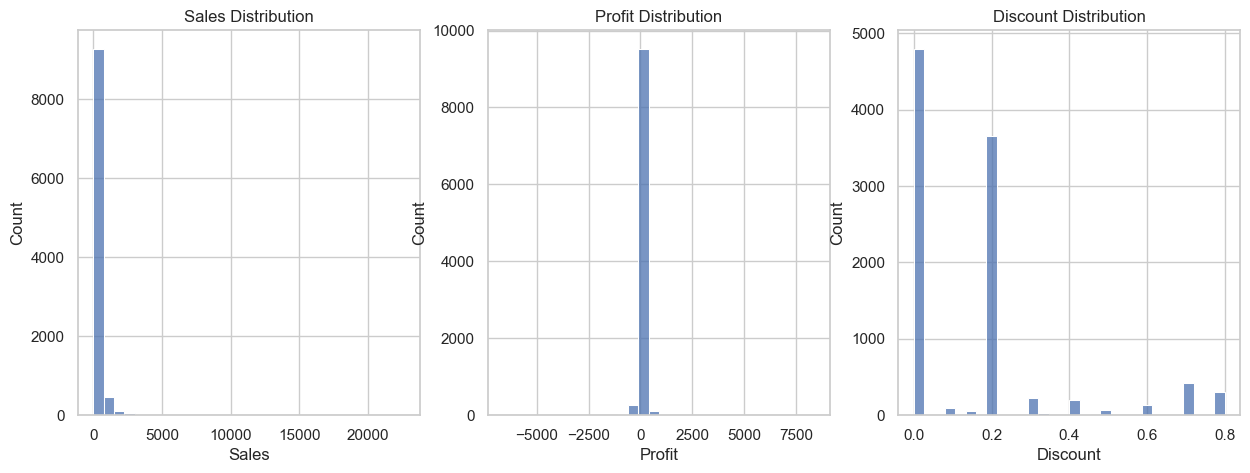

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales, profit, and discount distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data['Sales'], bins=30, ax=axes[0])
axes[0].set_title('Sales Distribution')
sns.histplot(data['Profit'], bins=30, ax=axes[1])
axes[1].set_title('Profit Distribution')
sns.histplot(data['Discount'], bins=30, ax=axes[2])
axes[2].set_title('Discount Distribution')
plt.show()


In [43]:
# Set style for better visuals
sns.set(style="whitegrid")

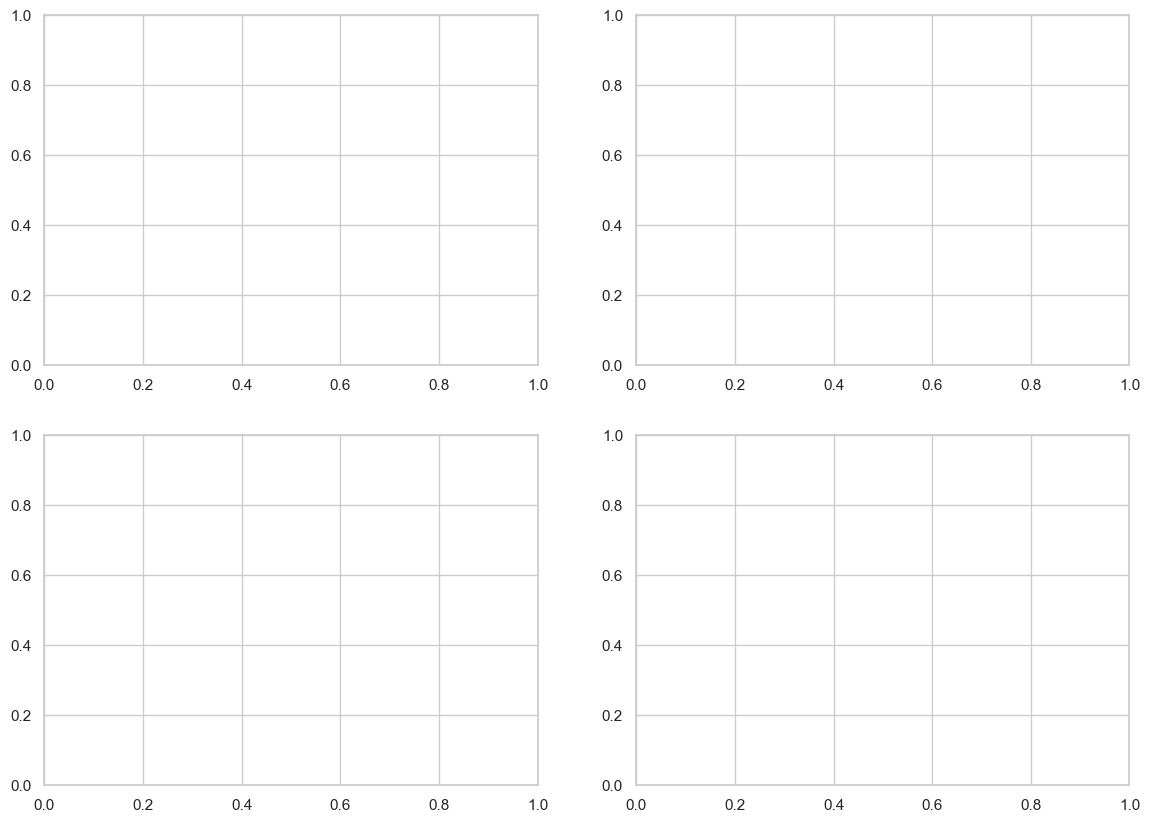

In [44]:
# Create subplots for key numeric columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

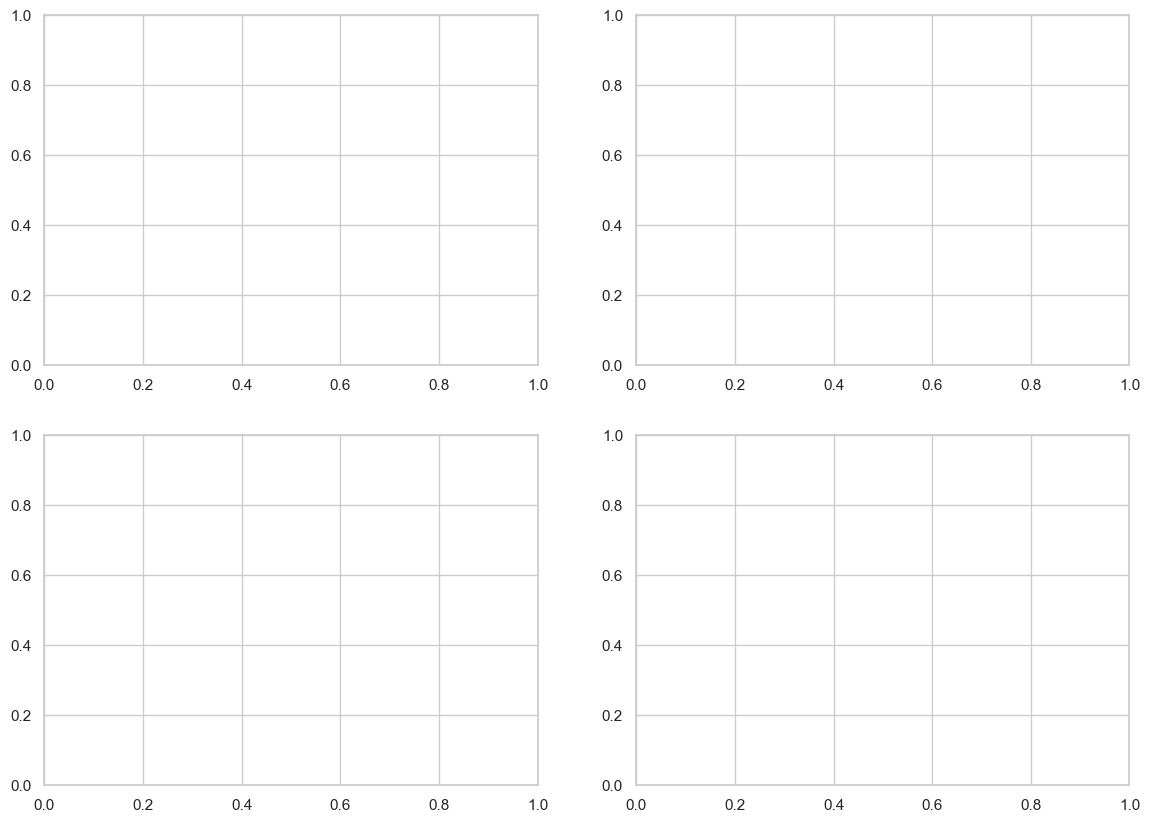

In [45]:
# Create subplots for key numeric columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

In [46]:
missing = data.isna().sum().to_frame('missing_count')
missing['missing_pct'] = (missing['missing_count'] / len(data) * 100).round(2)
print("\n--- MISSING VALUE SUMMARY ---")
display(missing.sort_values(by='missing_pct', ascending=False))


--- MISSING VALUE SUMMARY ---


,missing_count,missing_pct
Row ID,0,0.0
Order ID,0,0.0
Order Date,0,0.0
Ship Date,0,0.0
Ship Mode,0,0.0
Customer ID,0,0.0
Customer Name,0,0.0
Segment,0,0.0
Country,0,0.0
City,0,0.0


In [47]:
data_filled = data.copy()
for col in data_filled.columns:
    if data_filled[col].dtype == 'object':
        data_filled[col].fillna(data_filled[col].mode()[0], inplace=True)
    else:
        data_filled[col].fillna(data_filled[col].median(), inplace=True)

print("\n Missing values handled (mode for categorical, median for numeric).")


 Missing values handled (mode for categorical, median for numeric).


C:\Users\PMLS\AppData\Local\Temp\ipykernel_16320\3851309302.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filled[col].fillna(data_filled[col].median(), inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_16320\3851309302.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [48]:
for col in data_filled.columns:
    if 'date' in col.lower():
        data_filled[col] = pd.to_datetime(data_filled[col], errors='coerce')

print("\n--- UPDATED DATA TYPES ---")
print(data_filled.dtypes)


--- UPDATED DATA TYPES ---
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [49]:
numeric_cols = data_filled.select_dtypes(include=[np.number]).columns
categorical_cols = data_filled.select_dtypes(include=['object']).columns


In [50]:
summary_stats = data_filled[numeric_cols].agg(['mean','median','std','var','min','max','skew','kurtosis']).T
display(summary_stats)

,mean,median,std,var,min,max,skew,kurtosis
Row ID,4997.500000,4997.5000,2885.163629,8.324169e+06,1.000,9994.000,0.000000,-1.200000
Postal Code,55190.379428,56430.5000,32063.693350,1.028080e+09,1040.000,99301.000,-0.128526,-1.493020
Sales,229.858001,54.4900,623.245101,3.884345e+05,0.444,22638.480,12.972752,305.311753
Quantity,3.789574,3.0000,2.225110,4.951113e+00,1.000,14.000,1.278545,1.991889
Discount,0.156203,0.2000,0.206452,4.262242e-02,0.000,0.800,1.684295,2.409546
Profit,28.656896,8.6665,234.260108,5.487780e+04,-6599.978,8399.976,7.561432,397.188515


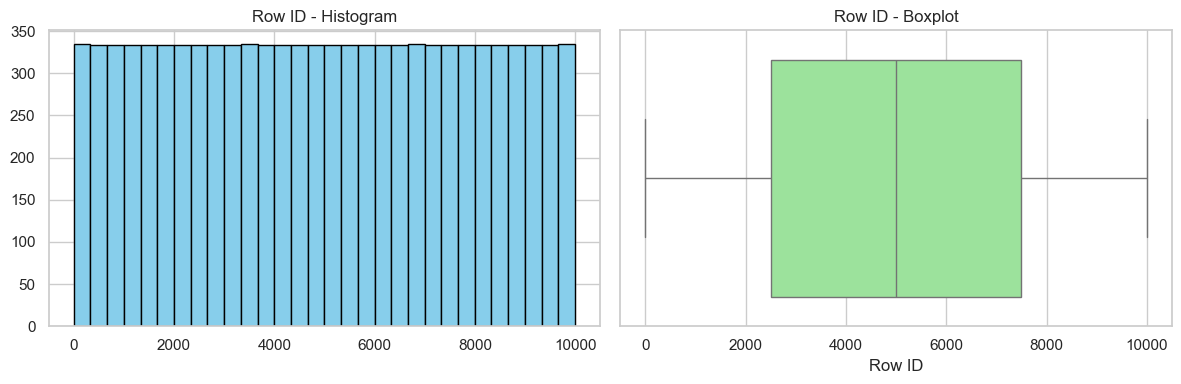

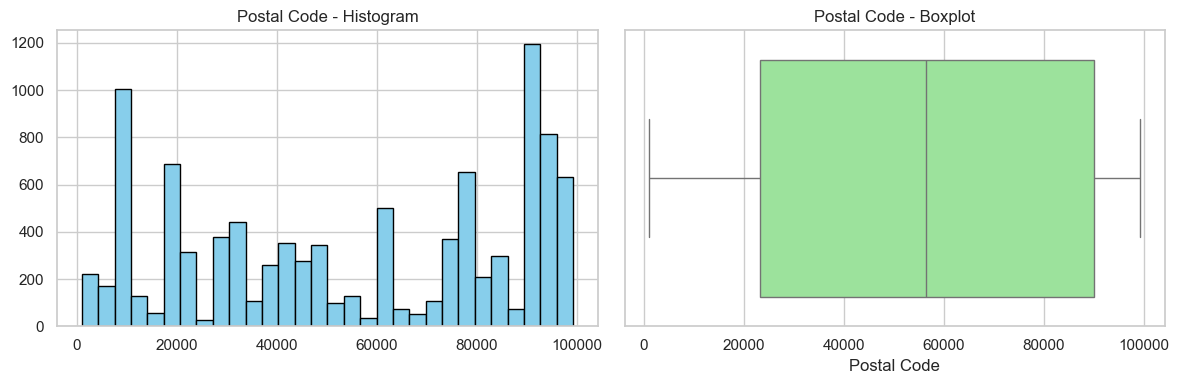

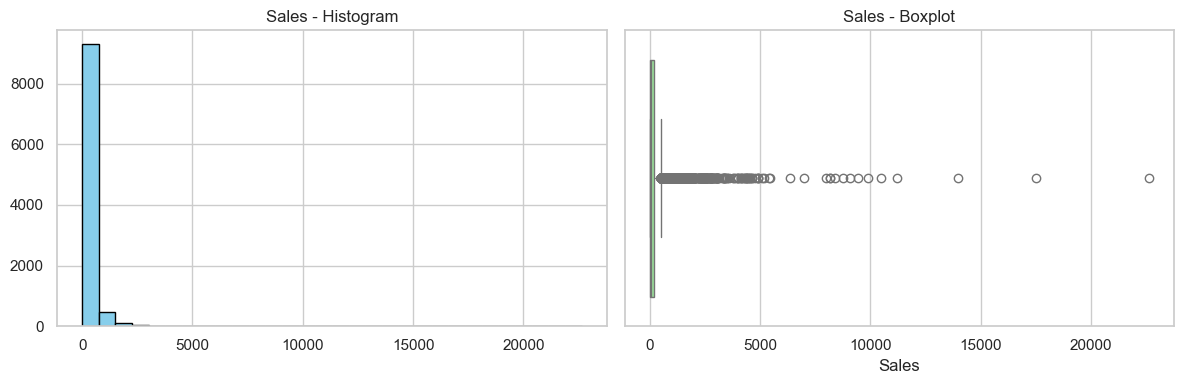

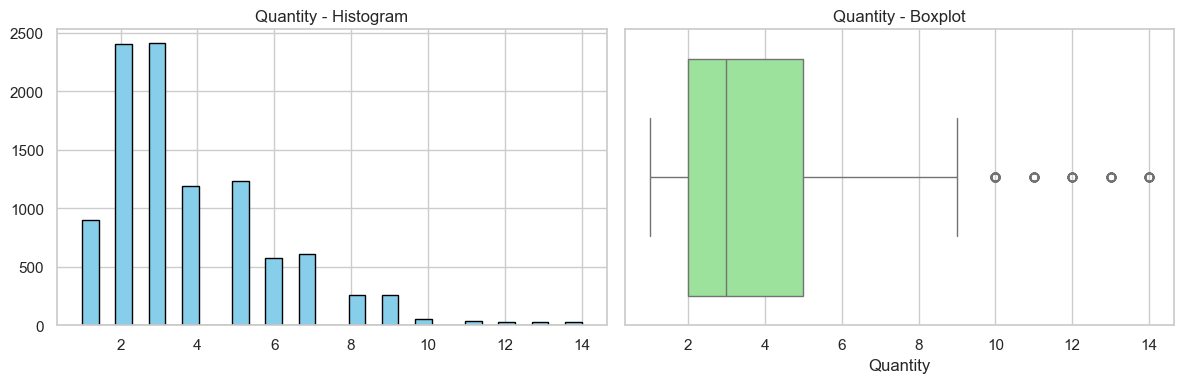

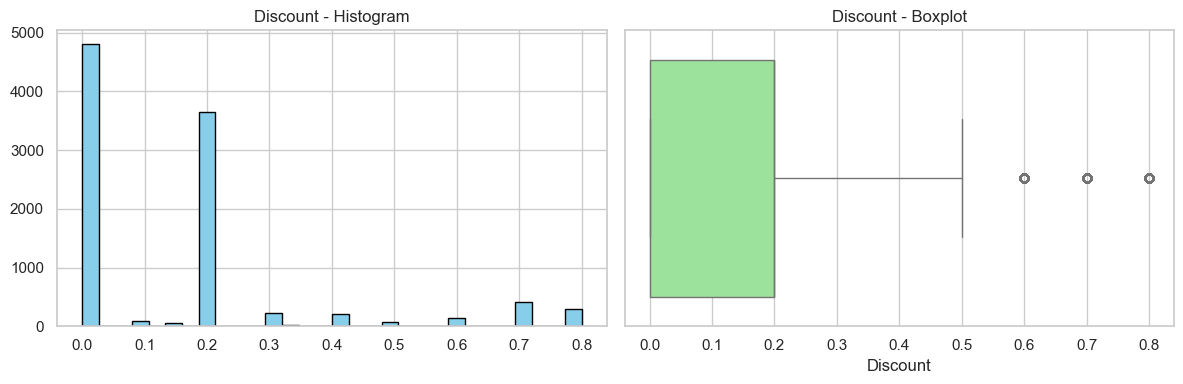

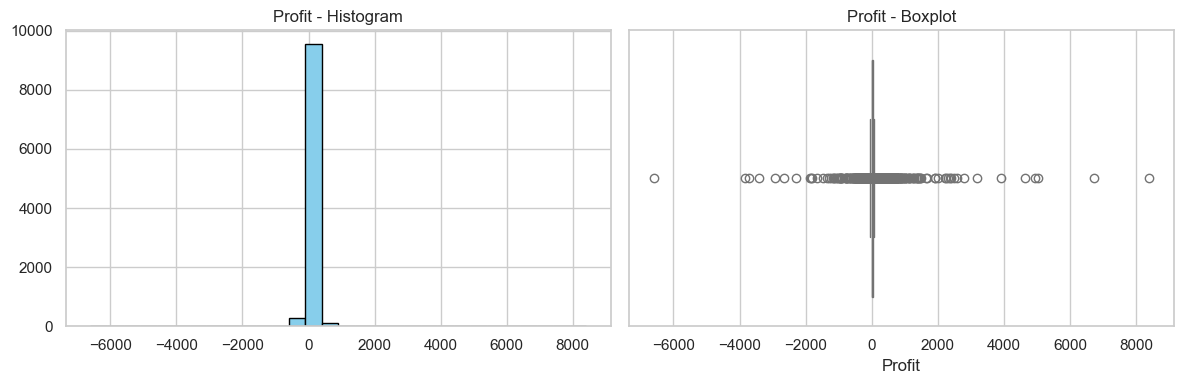

In [51]:
for col in numeric_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.hist(data_filled[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} - Histogram')
    plt.subplot(1,2,2)
    sns.boxplot(x=data_filled[col], color='lightgreen')
    plt.title(f'{col} - Boxplot')
    plt.tight_layout()
    plt.show()

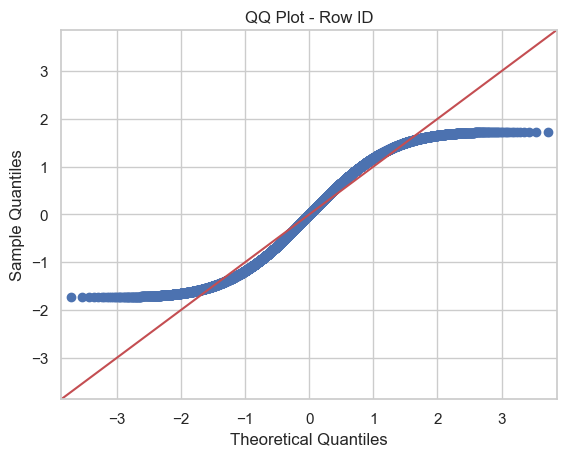

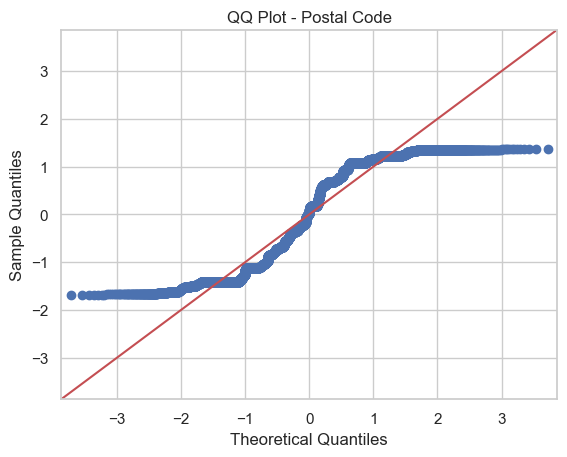

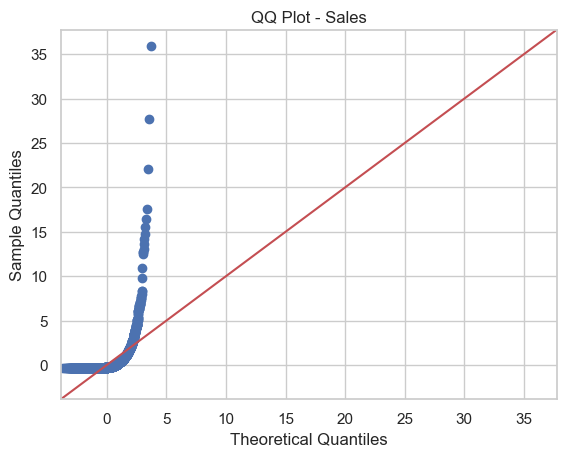

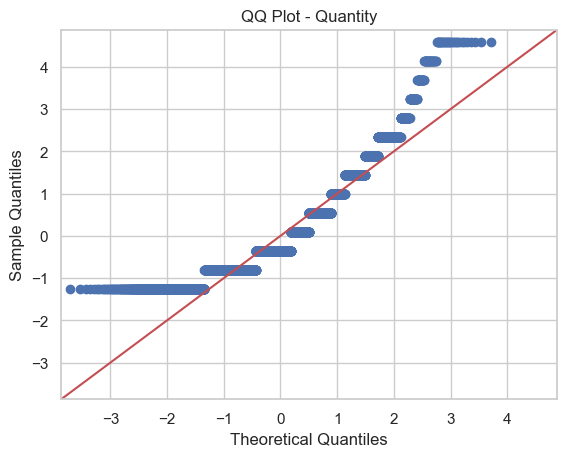

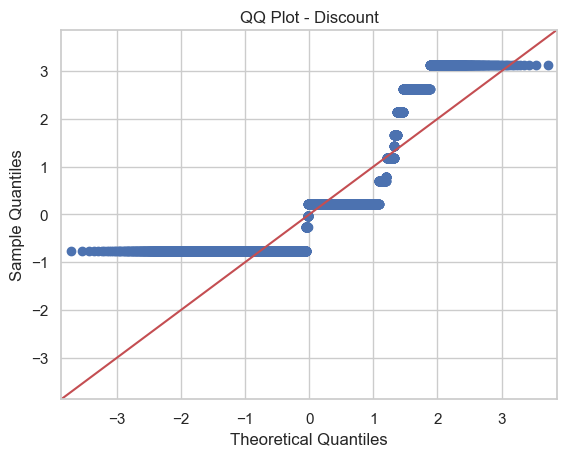

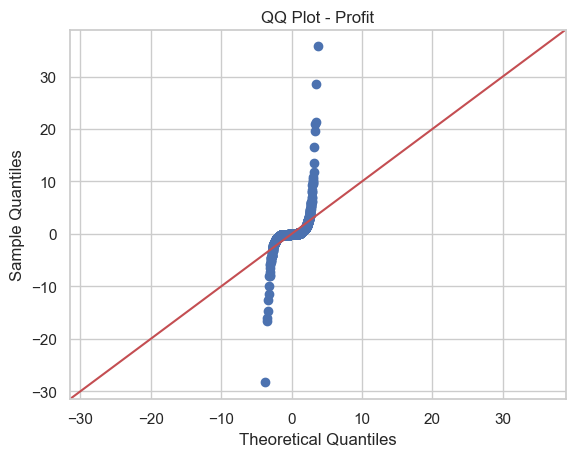

In [52]:
for col in numeric_cols:
    sm.qqplot(data_filled[col].dropna(), line='45', fit=True)
    plt.title(f"QQ Plot - {col}")
    plt.show()

In [55]:
outlier_summary = []
for col in numeric_cols:
    Q1 = data_filled[col].quantile(0.25)
    Q3 = data_filled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = ((data_filled[col] < lower) | (data_filled[col] > upper)).sum()
    outlier_summary.append([col, outliers, round(outliers/len(data_filled)*100, 2)])
outlier_data = pd.DataFrame(outlier_summary, columns=['Column', 'Outlier_Count', 'Outlier_%'])
print("\n--- OUTLIER SUMMARY ---")
display(outlier_data)


--- OUTLIER SUMMARY ---


,Column,Outlier_Count,Outlier_%
0,Row ID,0,0.00
1,Postal Code,0,0.00
2,Sales,1167,11.68
3,Quantity,170,1.70
4,Discount,856,8.57
5,Profit,1881,18.82


In [57]:
data_wins = data_filled.copy()
for col in numeric_cols:
    lower = data_wins[col].quantile(0.01)
    upper = data_wins[col].quantile(0.99)
    data_wins[col] = np.clip(data_wins[col], lower, upper)

print("\n Winsorization completed for numeric columns (1st–99th percentile).")


 Winsorization completed for numeric columns (1st–99th percentile).


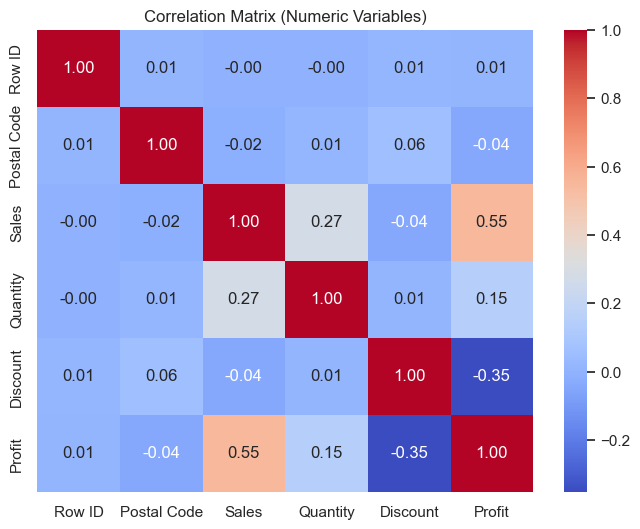

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(data_wins[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numeric Variables)")
plt.show()

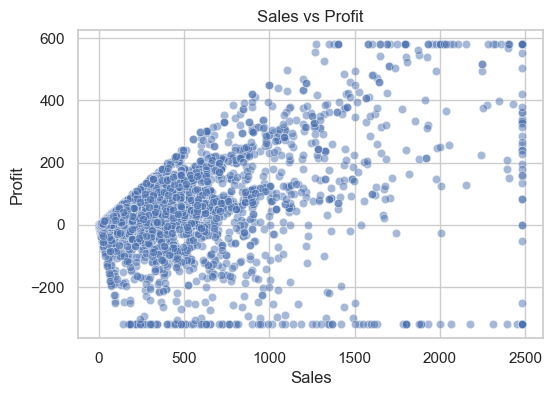

In [59]:
if {'Sales','Profit'}.issubset(data_wins.columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Sales', y='Profit', data=data_wins, alpha=0.5)
    plt.title("Sales vs Profit")
    plt.show()

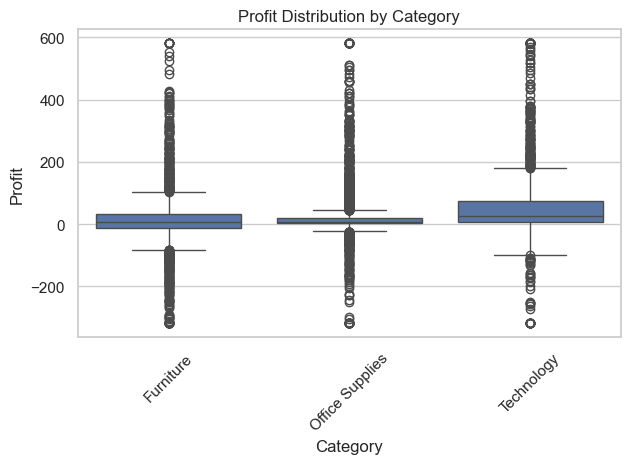

In [60]:
if {'Category','Profit'}.issubset(data_wins.columns):
    plt.figure(figsize=(7,4))
    sns.boxplot(x='Category', y='Profit', data=data_wins)
    plt.title("Profit Distribution by Category")
    plt.xticks(rotation=45)
    plt.show()

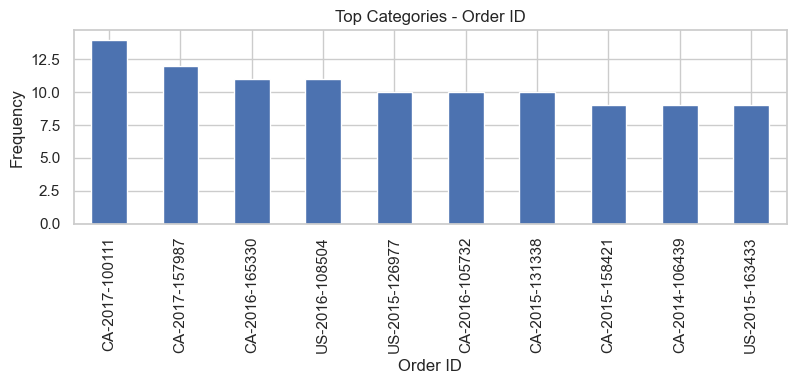

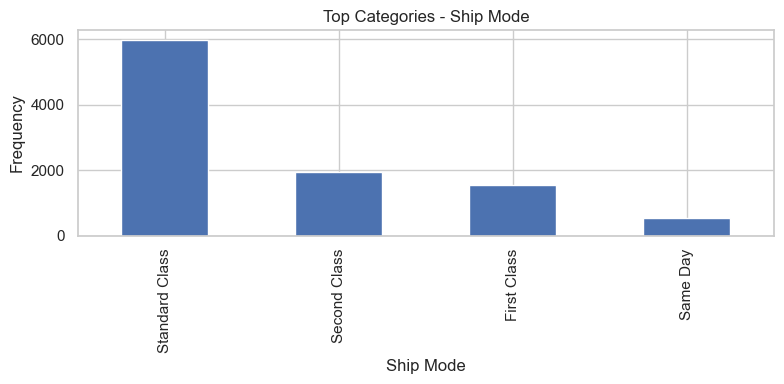

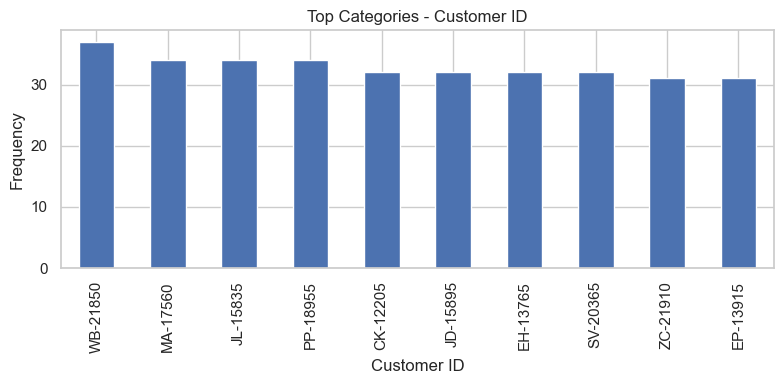

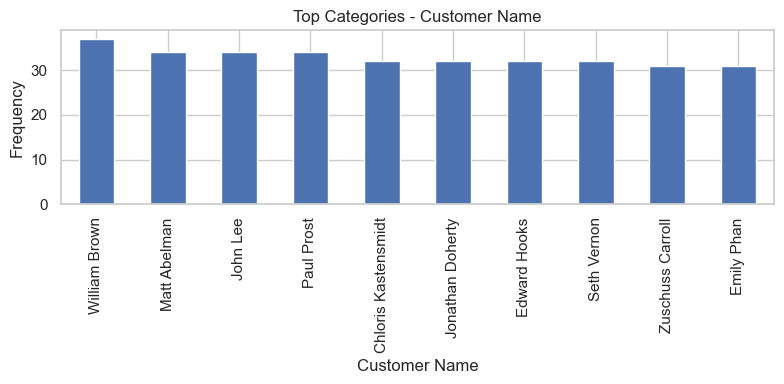

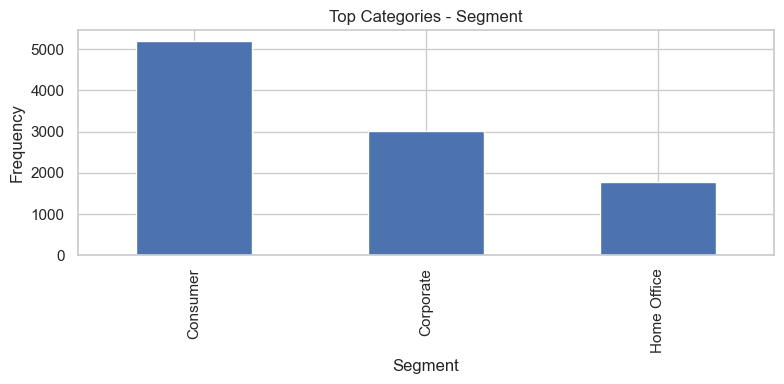

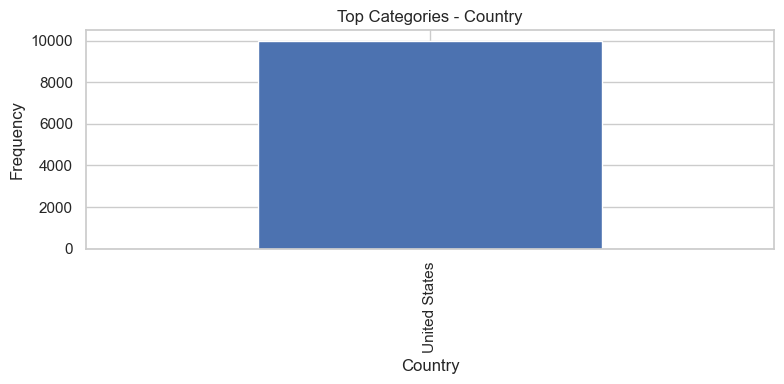

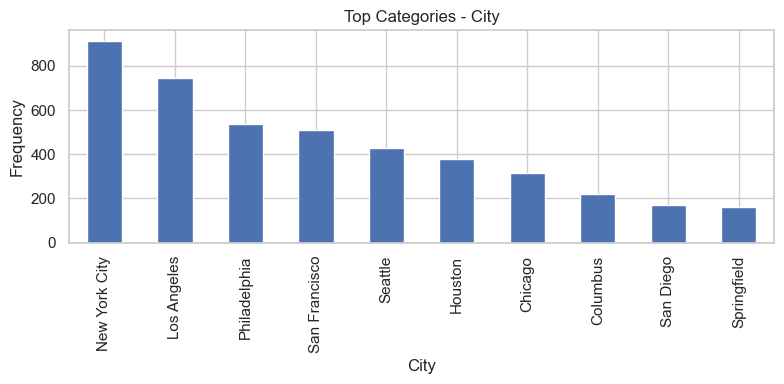

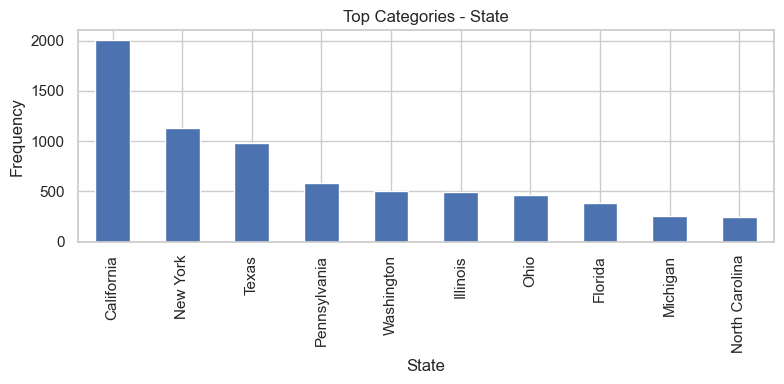

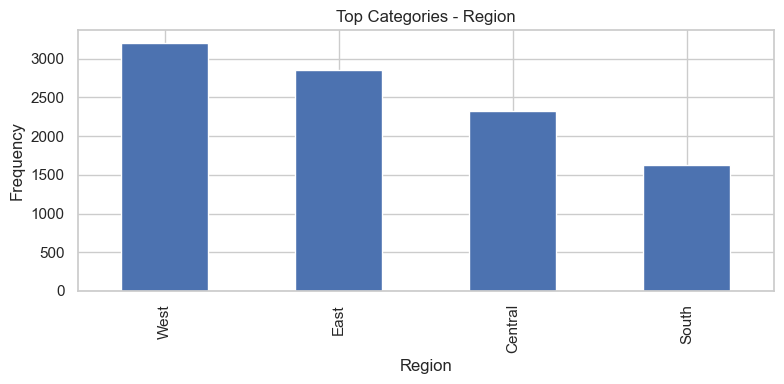

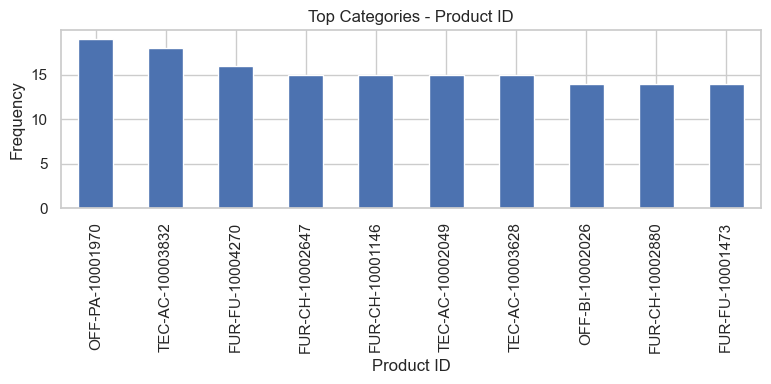

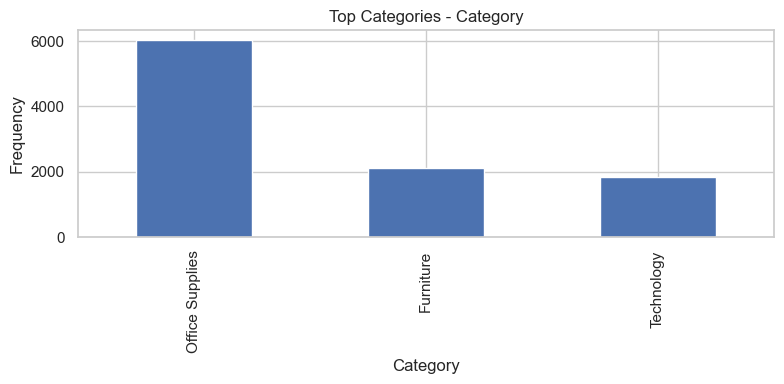

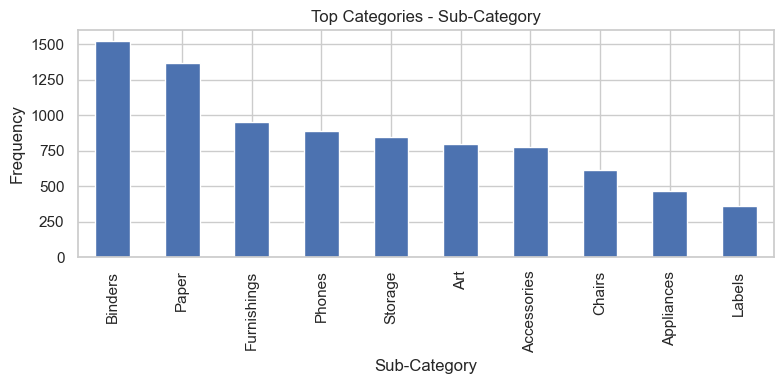

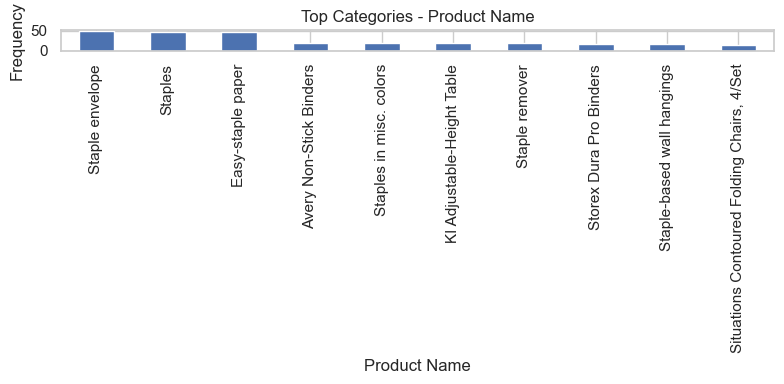


 Categorical analysis completed.


In [61]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    data_wins[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top Categories - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

print("\n Categorical analysis completed.")

### Univariate Analysis Insights

- **Sales**: Most sales are clustered under $500, but there are some very high values — possible **outliers**.
- **Profit**: Distribution shows many low or negative profit orders, indicating **some losses** (perhaps due to high discounts or cost).
- **Discount**: Discounts are mostly low, but some reach up to 80%. Heavy discounts might hurt profits.
- **Quantity**: Most orders contain 1–5 items, meaning **small-size retail sales** dominate.


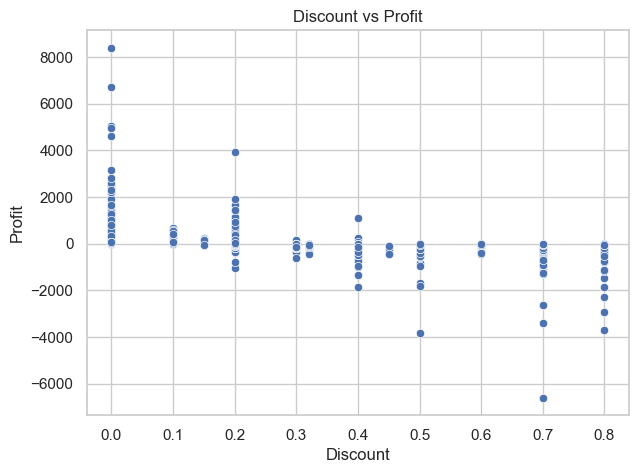

In [62]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.show()


### Insight: Discount vs Profit
- There’s a **negative relationship** between discount and profit.
- As discount increases, profit tends to decrease.
- Some high-discount sales even result in **losses** (negative profit).


C:\Users\PMLS\AppData\Local\Temp\ipykernel_16320\493131742.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Category', y='Profit', estimator='mean', ci=None)


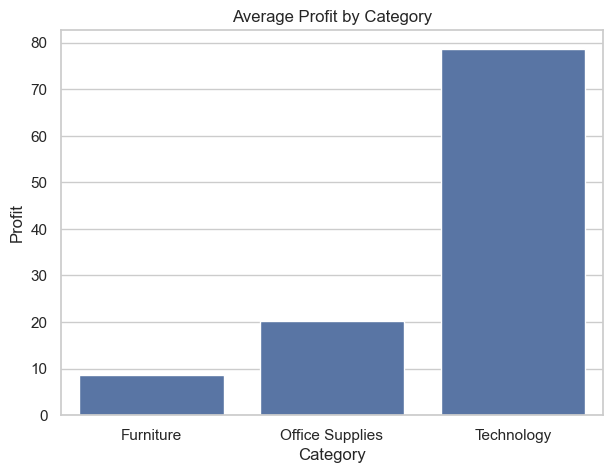

In [63]:
plt.figure(figsize=(7,5))
sns.barplot(data=data, x='Category', y='Profit', estimator='mean', ci=None)
plt.title('Average Profit by Category')
plt.show()


### Insight: Average Profit by Category
- **Technology** products give the **highest average profit**.
- **Furniture** has moderate profit.
- **Office Supplies** yield the **lowest profit** margin.


C:\Users\PMLS\AppData\Local\Temp\ipykernel_16320\1889611706.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Region', y='Profit', estimator='mean', ci=None)


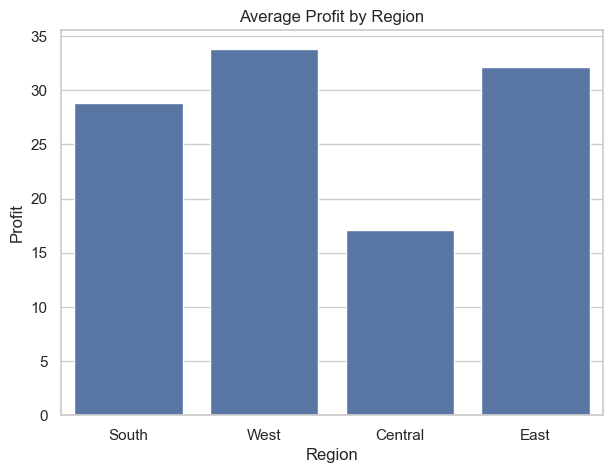

In [64]:
plt.figure(figsize=(7,5))
sns.barplot(data=data, x='Region', y='Profit', estimator='mean', ci=None)
plt.title('Average Profit by Region')
plt.show()


### Insight: Profit by Region
- Some regions perform better than others.
- The **West** and **East** regions generally have higher profit margins.
- The **South** region may need attention due to lower profitability.


C:\Users\PMLS\AppData\Local\Temp\ipykernel_16320\2215806199.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Category', y='Profit', hue='Region', estimator='mean', ci=None)


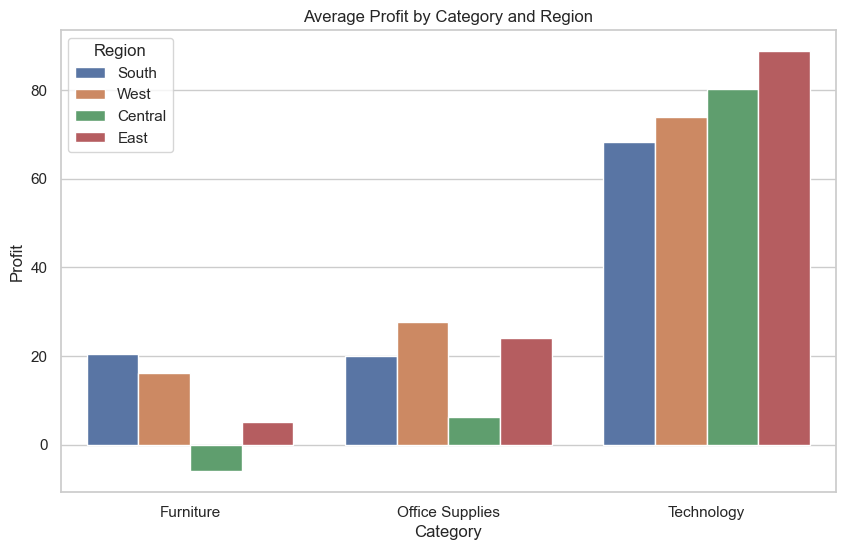

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Category', y='Profit', hue='Region', estimator='mean', ci=None)
plt.title('Average Profit by Category and Region')
plt.show()


### Insight: Profit by Category and Region
- **Technology** gives high profit across all regions.
- **Furniture** profit varies significantly by region — some regions show lower or negative profit.
- The **West region** performs best overall.


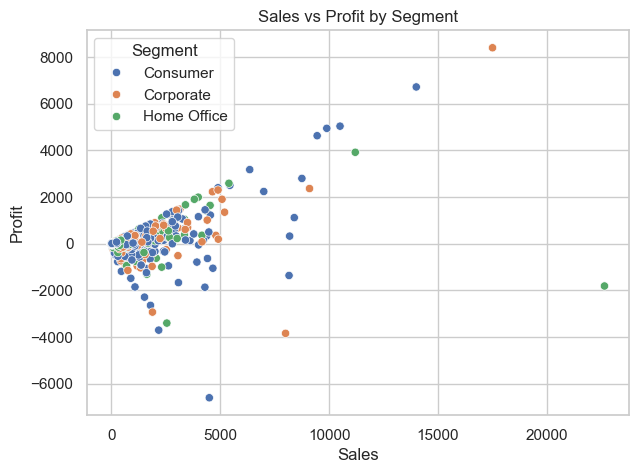

In [66]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x='Sales', y='Profit', hue='Segment')
plt.title('Sales vs Profit by Segment')
plt.show()


### Insight: Sales vs Profit by Segment
- **Corporate and Home Office** segments show higher profit variability.
- **Consumer segment** has more small sales with lower profits.
- Different segments target different customer types, influencing profitability.


In [67]:
print("\n--- KEY INSIGHTS ---")

if 'Profit' in data.columns:
    profit_mean = data['Profit'].mean()
    profit_negative_pct = (data['Profit'] < 0).mean() * 100
    print(f"Average Profit: {profit_mean:,.2f}")
    print(f"Percentage of negative-profit transactions: {profit_negative_pct:.2f}%")


--- KEY INSIGHTS ---
Average Profit: 28.66
Percentage of negative-profit transactions: 18.72%


In [69]:
if 'Sales' in data.columns:
    print(f"Total Sales: {data['Sales'].sum():,.2f}")

print("\nCorrelation between Sales and Profit:",
      data['Sales'].corr(data['Profit']) if {'Sales','Profit'}.issubset(data.columns) else "N/A")

print("\nEDA Completed Successfully!")

Total Sales: 2,297,200.86

Correlation between Sales and Profit: 0.4790643497377058

EDA Completed Successfully!


### 🏁 Final Summary of Insights

- **Average Profit:** Shows how much profit the company earns per transaction on average.  
- **Negative-Profit Transactions:** Indicates the percentage of orders that caused a loss (profit < 0).  
- **Total Sales:** Represents the overall revenue generated from all transactions in the dataset.  
- **Correlation (Sales vs Profit):** Measures how strongly sales and profit are related:
  - Value near **1** → Strong positive relation (higher sales = higher profit)
  - Value near **0** → Weak relation
  - Value near **-1** → Strong negative relation (higher sales = lower profit due to discounts)

### ✅ Conclusion:
The Exploratory Data Analysis (EDA) was completed successfully.  
We have identified sales patterns, profit-driving factors, and areas of loss that can guide business decisions.
